In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression,Ridge,Lasso

from sklearn.neighbors import KNeighborsRegressor

import sklearn.datasets as datasets

In [3]:
faces = datasets.fetch_olivetti_faces()

In [4]:
data = faces['images']
data.shape

(400, 64, 64)

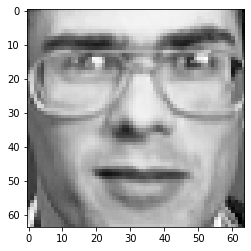

In [6]:
index = np.random.randint(400,size = 1)[0]

plt.imshow(data[index],cmap = plt.cm.gray)

In [46]:
32*64

2048

In [7]:
a = np.random.randint(100,size = 512)
a

array([61, 75, 83, 79, 49, 59, 19, 69, 55, 79, 78, 18, 78, 67, 31, 68,  1,
       90, 95, 60, 86, 86, 71,  9, 27, 68, 54, 35, 91, 55, 41, 90, 16, 51,
       51, 70, 39, 77, 72, 59, 49, 20, 64,  7,  4, 96, 35, 50, 77,  3, 18,
       34, 39, 90, 50, 65, 75, 46, 79, 40, 99, 85,  2, 47, 48, 78, 69, 43,
       96, 67, 63,  3, 19, 26, 79, 53, 63, 67, 11, 51, 11,  3, 40, 12,  1,
       37, 94, 10, 28, 92, 41, 37, 39, 83, 63, 22, 98, 27, 90, 74, 53, 41,
       99, 27, 15, 74, 74, 47, 69, 60, 54,  6, 34,  9, 36, 14, 56, 23, 79,
       32, 55, 68, 50,  7,  9, 49, 21, 13, 75, 87,  9, 51, 70, 46, 38, 18,
       52, 30, 14, 24, 88, 20, 69, 79, 95, 26, 42, 70, 96, 14, 53, 83, 44,
       71, 95, 63, 64, 12, 40, 58, 55, 88, 19, 19, 69, 59,  0, 72, 27, 52,
       21, 82,  0, 23, 45,  6, 48, 85, 90, 93, 82, 92, 89, 39, 22, 32, 97,
       61, 74, 24, 74, 13, 27, 98, 31, 30, 76, 15,  1, 81, 27, 37,  5, 20,
       30, 18, 74,  4, 19, 93, 31, 75, 85, 38, 73, 30, 86, 20, 59, 71, 54,
       30,  8, 44, 25, 18

In [10]:
a[511]

79

In [8]:
a[-1]

79

In [11]:
# 上半张人脸
X = data[:,:32].reshape(400,-1)

# 下半张人脸
y = data[:,32:].reshape(400,-1)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 10)

In [14]:
X_train.shape

(390, 2048)

In [15]:
y_train.shape

(390, 2048)

In [16]:
X_test.shape

(10, 2048)

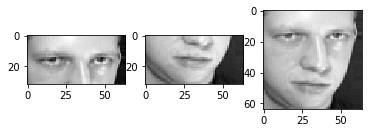

In [19]:
index = np.random.randint(390,size = 1)[0]

face_up = X_train[index].reshape(32,64)
face_down = y_train[index].reshape(32,64)
ax = plt.subplot(1,3,1)
ax.imshow(face_up,cmap = plt.cm.gray)

ax = plt.subplot(1,3,2)
ax.imshow(face_down,cmap = plt.cm.gray)

ax = plt.subplot(1,3,3)
ax.imshow(np.concatenate([face_up, face_down], axis = 0), cmap = 'gray')

In [20]:
estimators = {}

estimators['KNN'] = KNeighborsRegressor(n_neighbors=5)

estimators['Lr'] = LinearRegression()

estimators['Ridge'] = Ridge(alpha=1)

estimators['Lasso'] = Lasso(alpha=1)

In [21]:
predict_ = {}
for key,model in estimators.items():
    model.fit(X_train,y_train)
    
#     预测：根据上半张量，预测下半张脸
    y_ = model.predict(X_test)
    
    predict_[key] = y_

In [22]:
for i,key in enumerate(predict_):
    print(i,key)

0 KNN
1 Lr
2 Ridge
3 Lasso


In [23]:
X_test.shape

(10, 2048)

In [24]:
predict_

{'KNN': array([[0.46363634, 0.47190085, 0.4619835 , ..., 0.5066116 , 0.41322318,
         0.40330577],
        [0.55123967, 0.5561983 , 0.5429752 , ..., 0.18347107, 0.21570249,
         0.25702482],
        [0.37603307, 0.41404957, 0.44132233, ..., 0.41735536, 0.37438017,
         0.37272727],
        ...,
        [0.39338845, 0.38347107, 0.4016529 , ..., 0.57520664, 0.62809914,
         0.5305785 ],
        [0.661157  , 0.6454545 , 0.6553719 , ..., 0.40495867, 0.41900826,
         0.40495867],
        [0.3446281 , 0.4264463 , 0.5297521 , ..., 0.4107438 , 0.2586777 ,
         0.22892562]], dtype=float32),
 'Lr': array([[0.4239006 , 0.44635075, 0.43124148, ..., 0.63213134, 0.5941868 ,
         0.54422176],
        [0.40004778, 0.4862932 , 0.54115593, ..., 0.20600897, 0.35310736,
         0.27989995],
        [0.36022025, 0.3160929 , 0.29969773, ..., 0.26227745, 0.31182072,
         0.41289902],
        ...,
        [0.3795734 , 0.3997745 , 0.47637394, ..., 0.48475796, 0.55788374,
      

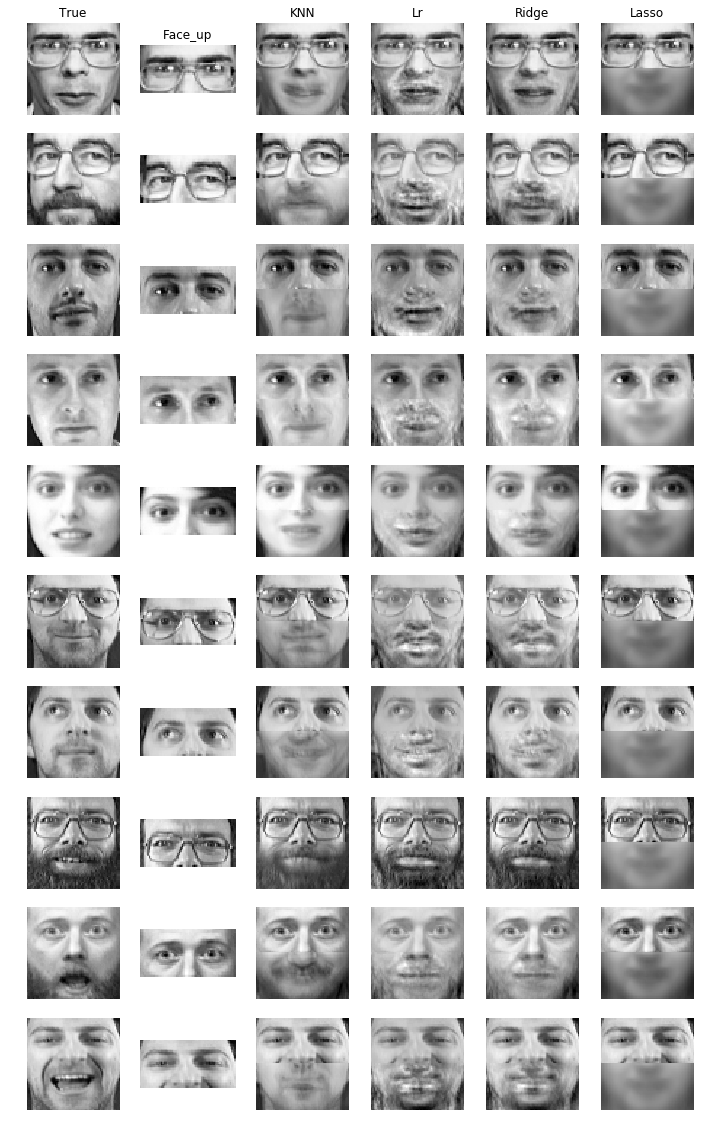

In [45]:
# 可视化

# 10行，6列
plt.figure(figsize=(6*2,10*2))


for i in range(10):
#     第一列
    ax = plt.subplot(10,6,1 + i * 6)
    face_up = X_test[i].reshape(32,64)
    face_down = y_test[i].reshape(32,64)
    ax.imshow(np.concatenate([face_up,face_down],axis = 0),cmap = 'gray')
    ax.axis('off')
    if i == 0:
        ax.set_title('True')
    
    #     第二列
    ax = plt.subplot(10,6,2 + i * 6)
    ax.imshow(face_up,cmap = 'gray')
    ax.axis('off')
    if i == 0:
        ax.set_title('Face_up')
        
        
#     第三列：3 + i*6 第四列4 + i*6 
#     预测人脸 predict_ 字典
    for j ,key in enumerate(predict_):
        ax = plt.subplot(10,6,3 + j + i * 6)
        
        y_ = predict_[key]
        
        face_down_ = y_[i].reshape(32,64)
        
        ax.imshow(np.concatenate([face_up,face_down_],axis = 0),cmap = plt.cm.gray)
        
        ax.axis('off')
        
        if i ==0:
            ax.set_title(key)